In [33]:
from scipy.stats import ttest_1samp
import numpy as np
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [34]:
df = pd.read_csv("ab_stats.csv", encoding_errors='ignore')
df.head()

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814


Стат значимо ли отличается ARPPU в двух группах ? Какие рекомендации дадите
менеджеру?


In [35]:
df.shape

(23652, 5)

Посмотрим на разбивку по тестовым группам.

In [36]:
df.ab_group.value_counts()

A    11835
B    11817
Name: ab_group, dtype: int64

ARPPU или Average Revenue Per Paying User - средний платеж платящего пользователя.

Посмотрим на выручку больше нуля.

In [37]:
df[df['revenue']>0]

,revenue,num_purchases,purchase,ab_group,av_site visit
45,1.885595,1,1,A,7.654627
54,1.002159,1,1,A,6.392489
82,2.990000,1,1,A,8.596604
104,49.990000,1,1,A,8.885633
110,22.093757,4,1,A,8.708759
...,...,...,...,...,...
23426,2.489611,1,1,B,9.015714
23493,74.950000,5,1,B,5.881950
23495,3.667866,1,1,B,7.450014
23584,19.990000,1,1,B,9.813696


Посмотрим статистику по группам.

In [38]:
df[df['ab_group']=='A'].describe()

,revenue,num_purchases,purchase,av_site visit
count,11835.000000,11835.000000,11835.000000,11835.000000
mean,0.404462,0.050697,0.021631,6.974724
std,13.133218,1.467511,0.145481,2.023533
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.656155
50%,0.000000,0.000000,0.000000,6.982329
75%,0.000000,0.000000,0.000000,8.345572
max,1303.609284,152.000000,1.000000,17.728836


In [39]:
df[df['ab_group']=='B'].describe()

,revenue,num_purchases,purchase,av_site visit
count,11817.000000,11817.000000,11817.000000,11817.000000
mean,0.244794,0.036473,0.019802,7.051559
std,3.176534,0.418480,0.139325,3.976799
min,0.000000,0.000000,0.000000,-8.286822
25%,0.000000,0.000000,0.000000,4.380984
50%,0.000000,0.000000,0.000000,7.060873
75%,0.000000,0.000000,0.000000,9.768648
max,113.830000,25.000000,1.000000,22.446822


Можно заметить, что максимальный чек в первой группе сильно больше, чем в группе B

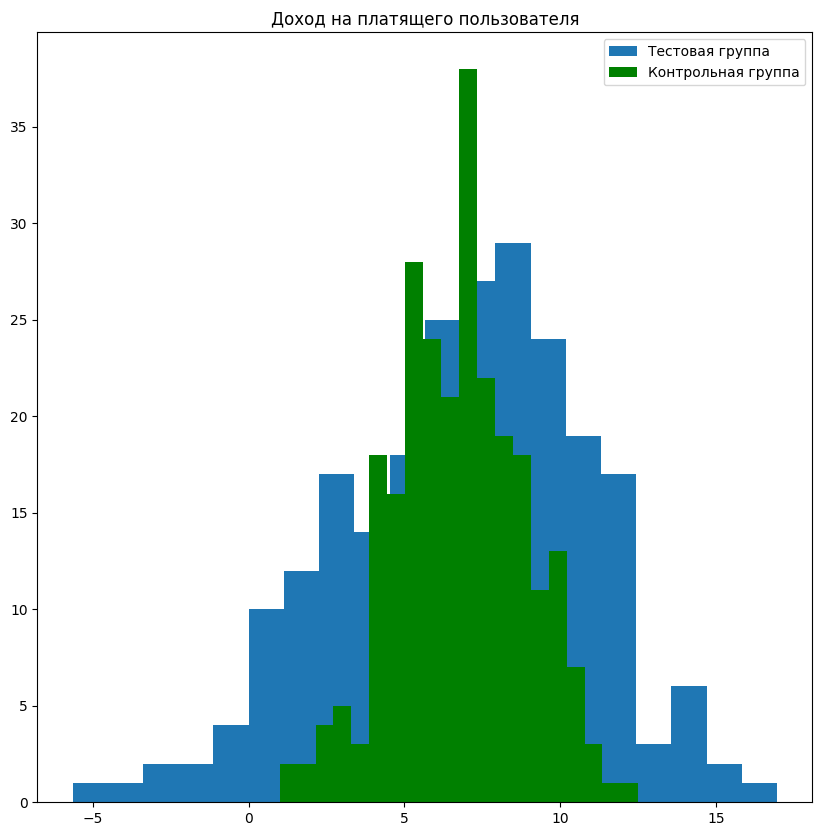

In [40]:
plt.figure(figsize=(10, 10))
control_visit = df['av_site visit'][(df['ab_group'] == 'A')&(df['revenue'] > 0)]
test_visit =df['av_site visit'][(df['ab_group'] == 'B')&(df['revenue'] > 0)]
plt.hist(test_visit,  bins=20, label='Тестовая группа')
plt.hist(control_visit, color='g', bins=20, label='Контрольная группа')
plt.title('Доход на платящего пользователя')
plt.legend();
plt.show()

Посмотрим распределение выручки по тетсовым группам.

In [41]:
df.groupby('ab_group')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
ab_group,,,,,,,,
A,11835.0,0.404462,13.133218,0.0,0.0,0.0,0.0,1303.609284
B,11817.0,0.244794,3.176534,0.0,0.0,0.0,0.0,113.830000


В первой группе у нас выручка больше, чем во второй, из графика видно, что распределение не подчиняется закону нормального распределения, используем критерий Манна-Уитни.

In [42]:
mw_stats = mannwhitneyu(x=df[(df['ab_group'] == 'A')&(df['purchase'] == 1)]['revenue'].values,
                                                  y=df[(df['ab_group'] == 'B')&(df['purchase'] == 1)]['revenue'].values)
mw_stats

MannwhitneyuResult(statistic=29729.5, pvalue=0.8871956616344514)

Критерий Манна-Уитни нам не позволяет принять альтернативную гипотезу о разнице arppu, так как p-value > alpha = 0,05.

Вывод: Выкатывать изменения с тестовой группой не имеет смысла, так как статистически значимой разницы нет.